# Customer Segmentation on Online Retail Dataset

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the online retail dataset
df1 = pd.read_csv("online_retail.csv")
df1.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate,StockCode,Description,CustomerAge,SpendingScore
0,1288.0,24953.0,6.0,35.17,Spain,01-01-2020 00:00,A,Electronics,67.0,4.0
1,NaN,31237.0,13.0,52.20,United Kingdom,01-01-2020 01:00,D,Toys and Games,28.0,16.0
2,1042.0,24380.0,46.0,93.70,Netherlands,01-01-2020 02:00,B,Clothing,62.0,63.0
3,1849.0,38782.0,79.0,73.65,Spain,01-01-2020 03:00,E,Sports and Outdoors,55.0,42.0
4,1117.0,32953.0,90.0,57.92,France,NaN,C,Home and Kitchen,45.0,33.0


# Data Preprocessing

Handling Null Values

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     2993 non-null   float64
 1   InvoiceNo      2995 non-null   float64
 2   Quantity       2991 non-null   float64
 3   UnitPrice      2992 non-null   float64
 4   Country        2991 non-null   object 
 5   InvoiceDate    2985 non-null   object 
 6   StockCode      2991 non-null   object 
 7   Description    2991 non-null   object 
 8   CustomerAge    2993 non-null   float64
 9   SpendingScore  2994 non-null   float64
dtypes: float64(6), object(4)
memory usage: 246.2+ KB


<Axes: >

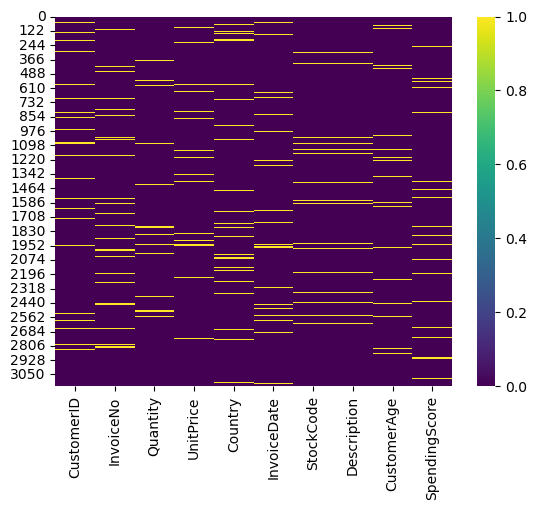

In [72]:
# Visualizing the null values in heatmap
sns.heatmap(df1.isna(), cmap='viridis')

In [73]:
df1.isna().sum()

CustomerID       157
InvoiceNo        155
Quantity         159
UnitPrice        158
Country          159
InvoiceDate      165
StockCode        159
Description      159
CustomerAge      157
SpendingScore    156
dtype: int64

For the customer segmentation problem CustomerId, Invoice No. and InvoiceDate is a must. Since the missing values are less than 5% we drop them

In [74]:
# Copying the original data into another variable 
df2 = df1.copy()

In [75]:
# Dropping the mentioned columns

df2 = df2.dropna(subset=['CustomerID', 'InvoiceNo', 'InvoiceDate'])

In [76]:
# Imputing the Null values in other columns

df2['Quantity'] = df2['Quantity'].fillna(0)
df2['UnitPrice'] = df2['UnitPrice'].fillna(df2['UnitPrice'].median())
df2['Country'] = df2['Country'].fillna(df2['Country'].mode()[0])
df2['StockCode'] = df2['StockCode'].fillna(df2['StockCode'].mode()[0])
df2['Description'] = df2['Description'].fillna('No Description')
df2['CustomerAge'] = df2['CustomerAge'].fillna(df2['CustomerAge'].median())
df2['SpendingScore'] = df2['SpendingScore'].fillna(df2['SpendingScore'].median())


<Axes: >

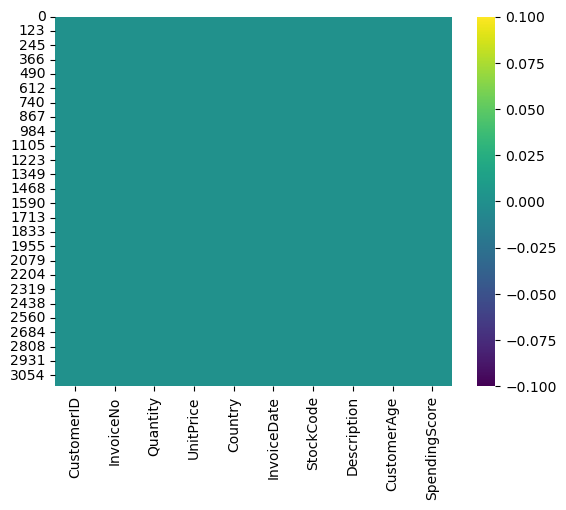

In [77]:
sns.heatmap(df2.isna(), cmap='viridis')

We successfully handled the null values


Now we continue with EDA

In [78]:
# Converting the 'InvoiceDate' column into datetime

df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], dayfirst=True)

In [80]:
# Creating 'Total Sales' Columnns for analysis purposes

df2['TotalSales'] = df2['Quantity'] * df2['UnitPrice']

<Axes: xlabel='StockCode', ylabel='TotalSales'>

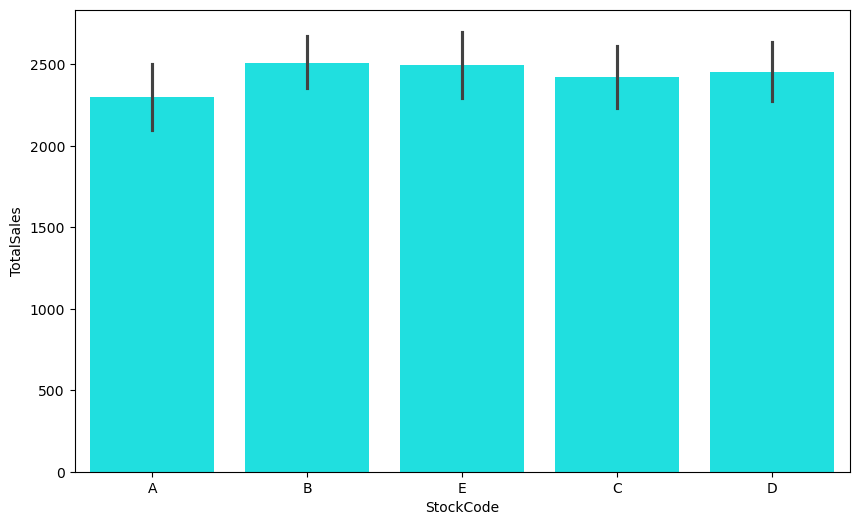

In [81]:
# Total Sales based on stock code

plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='TotalSales', data=df2, color='cyan')

In [83]:
# Creating another copy of the dataset to apply weekly and monthly sales
df_time = df2.copy()
df_time.set_index('InvoiceDate', inplace=True)


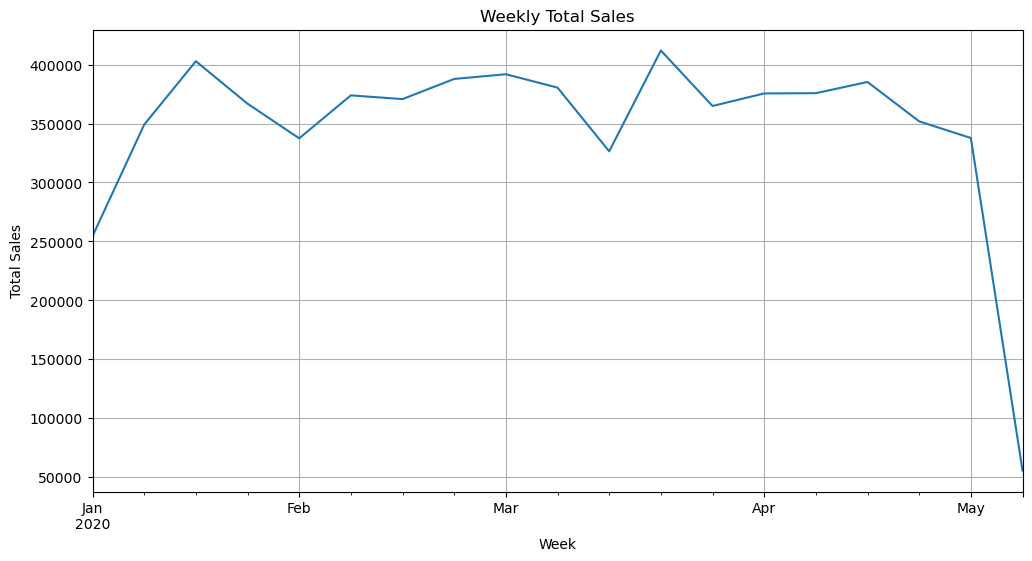

In [86]:
# Collecting weekly data
weekly_sales = df_time['TotalSales'].resample('W').sum()



plt.figure(figsize=(12,6))
weekly_sales.plot()
plt.title('Weekly Total Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

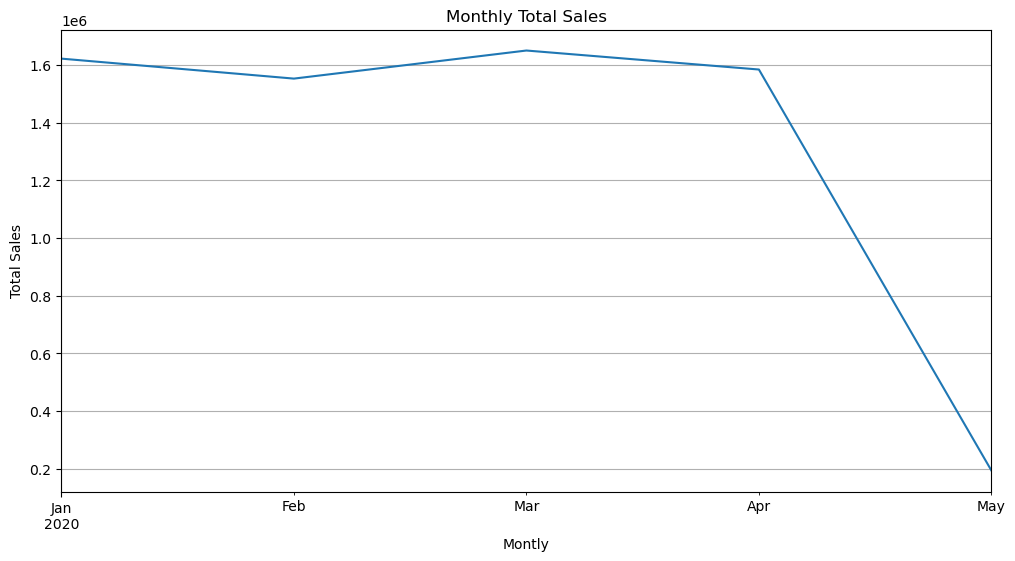

In [92]:
# Doing the same thing for monthly sales

monthly_sales = df_time['TotalSales'].resample('ME').sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Total Sales')
plt.xlabel('Montly')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

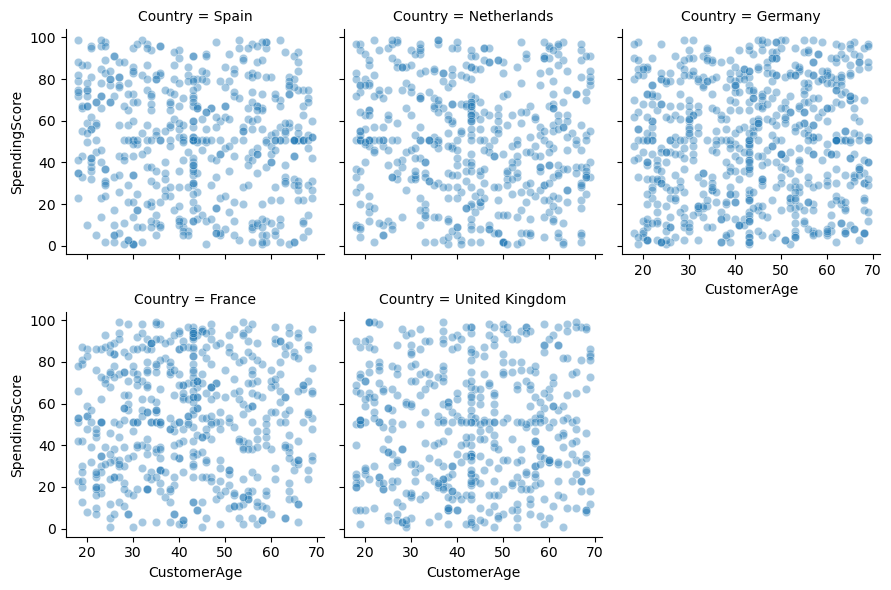

In [96]:
g = sns.FacetGrid(df2, col='Country', col_wrap=3)
g.map(sns.scatterplot, 'CustomerAge', 'SpendingScore', alpha=0.4)


In [97]:
df2[['CustomerAge', 'SpendingScore']].corr()


,CustomerAge,SpendingScore
CustomerAge,1.000000,-0.001694
SpendingScore,-0.001694,1.000000


From this we can infer that there is no linear relationship between spending score and customer age

<Axes: xlabel='StockCode', ylabel='UnitPrice'>

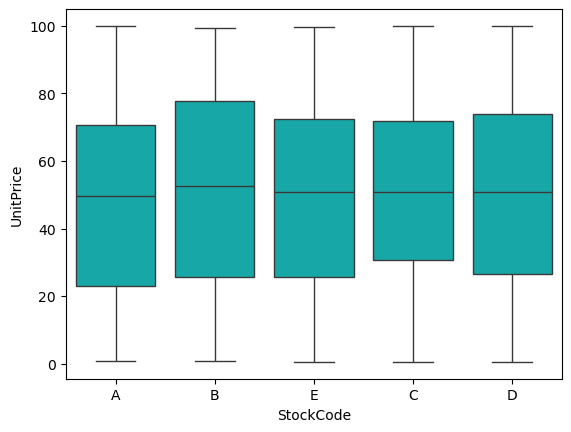

In [107]:
sns.boxplot(x='StockCode', y='UnitPrice', data=df2, color='c')


<Axes: xlabel='Country', ylabel='SpendingScore'>

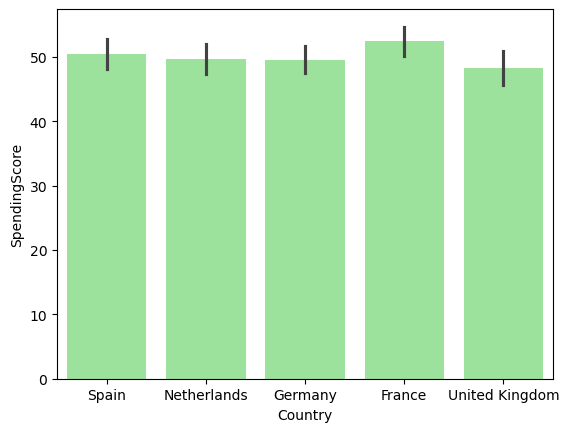

In [113]:
sns.barplot(x='Country', y='SpendingScore', data=df2,color='lightgreen')

<Axes: xlabel='CustomerAge', ylabel='TotalSales'>

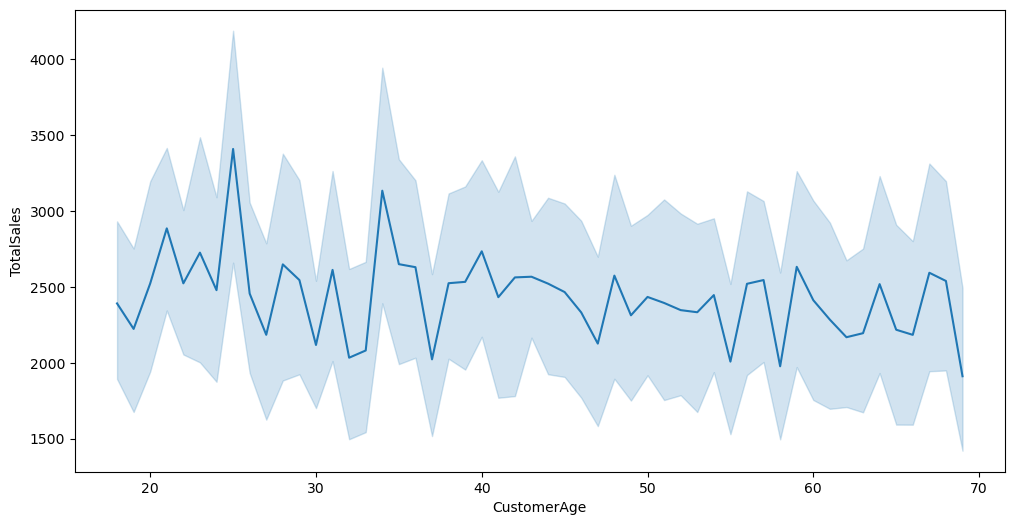

In [116]:
plt.figure(figsize=(12,6))
sns.lineplot(x='CustomerAge', y='TotalSales', data=df2)

<Axes: >

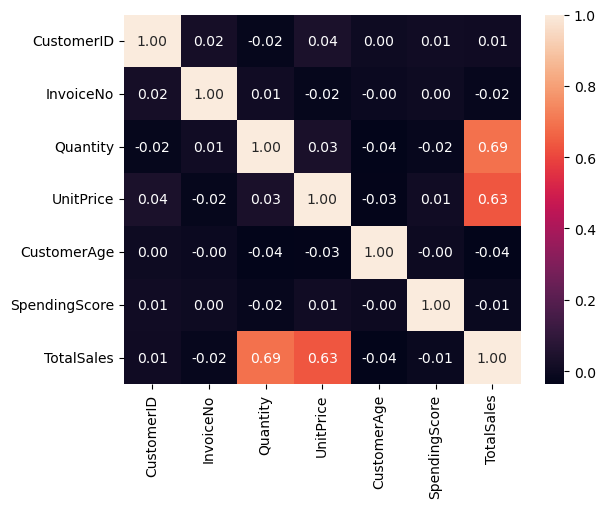

In [118]:
sns.heatmap(df2.corr(numeric_only=True), cbar=True, annot=True, fmt='.2f')

# Handling Outliers

In [119]:
df2.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice,InvoiceDate,CustomerAge,SpendingScore,TotalSales
count,2704.000000,2704.000000,2704.000000,2704.000000,2704,2704.000000,2704.000000,2704.000000
mean,1499.296967,30006.802145,47.809541,50.455584,2020-03-03 14:03:43.668638976,43.285133,50.116124,2441.181956
min,1000.000000,20010.000000,0.000000,0.510000,2020-01-01 00:00:00,18.000000,1.000000,0.000000
25%,1254.750000,25115.000000,22.000000,25.650000,2020-02-02 00:45:00,31.000000,27.000000,605.510000
50%,1504.000000,30025.000000,49.000000,50.820000,2020-03-03 05:30:00,43.000000,51.000000,1826.260000
75%,1740.250000,34986.000000,73.000000,73.900000,2020-04-03 15:15:00,56.000000,73.250000,3857.752500
max,1999.000000,39999.000000,99.000000,99.970000,2020-05-04 23:00:00,69.000000,99.000000,9833.670000
std,284.727724,5759.849099,29.708405,28.229047,NaN,14.653012,27.950312,2210.166882


From the above cell we can find that there isnt much of an outlier within the dataset

# Feature Engineering

In [120]:
# Creating a new month and week column

df2['Month'] = df2['InvoiceDate'].dt.month
df2['Week'] = df2['InvoiceDate'].dt.isocalendar().week

The year from the invoicedate has no use here. So, dropping InvoiceDate since we extracted month and week from that. And the column Invoice number has no impact in segmentation so dropping them Too

Also, dropping the description column since it has no value in customer segmentation without performing nlp

In [ ]:
df2.drop(columns=['InvoiceDate', 'Description'], inplace=True)